# RT1 Model definition and analysis.

This example shows how to setup and analyze an RT1 model specification with the [rt1 python package](https://github.com/raphaelquast/rt1_model) .

> **NOTE:** to run this example you need the additional dependencies [matplotlib](https://matplotlib.org/) and [ipympl](https://matplotlib.org/ipympl/).

In [1]:
%matplotlib widget
from rt1_model import RT1, surface, volume, set_loglevel
import matplotlib.pyplot as plt
set_loglevel("debug")

In [2]:
# Define the used volume-scattering phase function
V = volume.HenyeyGreenstein(t="t_v", ncoefs=8)

# Use a linear-combination of BRDFs as surface-scattering phase function
SRF = surface.LinComb(
    [
      ("x", surface.HG_nadirnorm(t="t", ncoefs=8, a=[1, 1, 1])),
      ("1 - x", surface.HG_nadirnorm(t="-t", ncoefs=8, a=[-1, 1, 1]))
    ]
    )

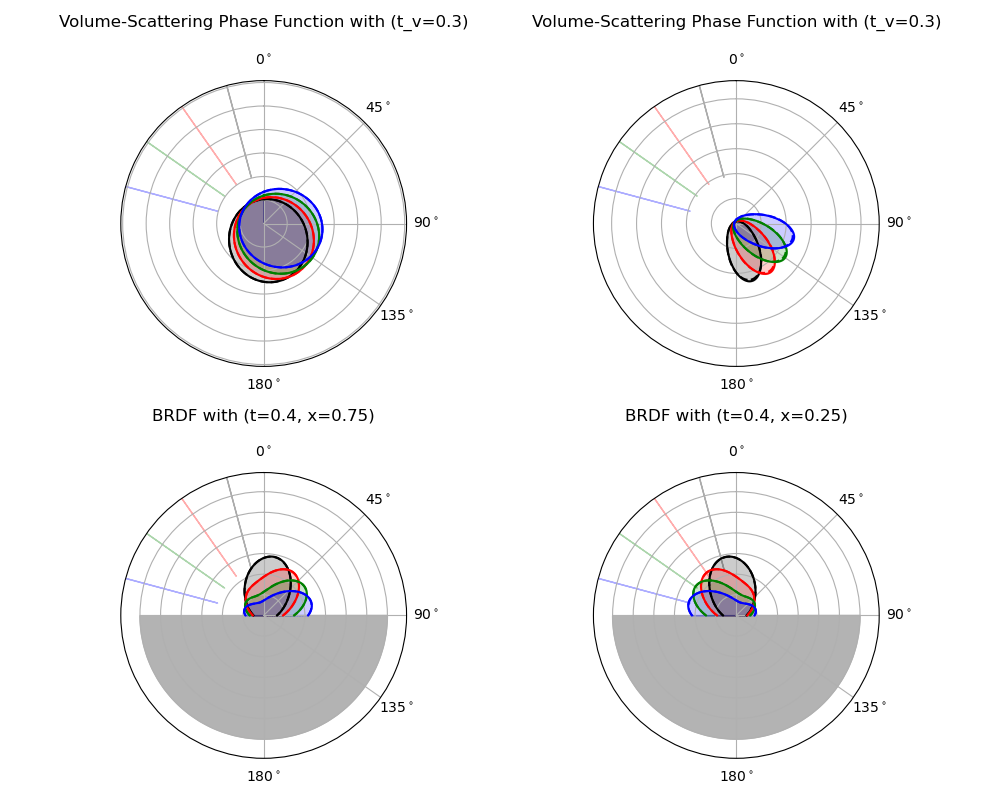

In [3]:
# visualize V and SRF as polarplots
f, axes = plt.subplots(2, 2, figsize=(10, 8), subplot_kw=dict(projection='polar'))

V.polarplot(param_dict=dict(t_v=0.15), polarax=axes[0][0], legend=False, label="Volume-Scattering Phase Function with (t_v=0.3)")
V.polarplot(param_dict=dict(t_v=0.5), polarax=axes[0][1], legend=False, label="Volume-Scattering Phase Function with (t_v=0.3)")
SRF.polarplot(param_dict=dict(x=0.75, t=0.4), legend=False, groundcolor=".7", polarax=axes[1][0], label="BRDF with (t=0.4, x=0.75)")
SRF.polarplot(param_dict=dict(x=0.25, t=0.4), legend=False, groundcolor=".7", polarax=axes[1][1], label="BRDF with (t=0.4, x=0.25)")
f.tight_layout()

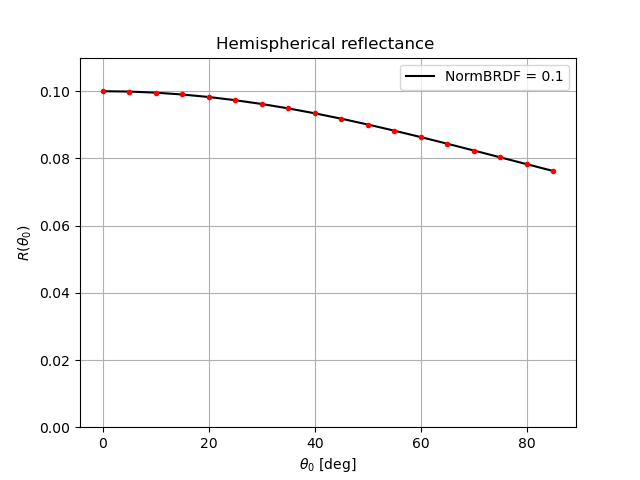

In [4]:
# check incidence-angle dependency of hemispherical reflectance of the surface BRDF
SRF.hemreflect(param_dict=dict(t=0.15, x=0.5, NormBRDF=0.1))

In [5]:
# Setup RT1 model
R = RT1(V=V, SRF=SRF, int_Q=True, sig0=True, dB=True)

## Analyze monostatic backscattering coefficient

17:21:52.698 DEBUG: Generation of fnevals functions...
17:21:52.700 INFO: Evaluating coefficients for interaction-term...
17:21:53.720 DEBUG: Expansion calculated, it took 1.0206915999999993 sec.
17:21:54.493 INFO: Coefficients extracted, it took 0.77096 sec.


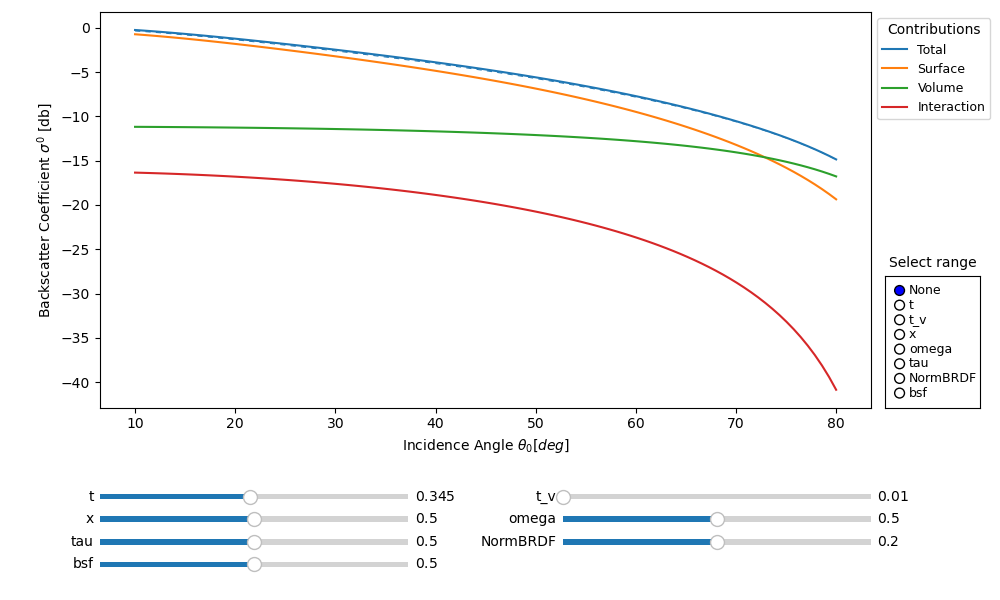

In [6]:
R.dB = True # Create monostatic plots in dB

# setup parameter ranges to analyze
param_dict=dict(t=(0.01, .7),
                t_v=(0.01, .7, 0.01),
                x=(0, 1),
                omega=(0,1),
                tau=(0,1),
                NormBRDF=(0, .4),
                bsf=(0, 1),
                )

a1 = R.analyze(param_dict=param_dict)

## Analyze 3D scattering distribution

17:21:55.803 WARNING: The analyze-plot shows results for 'fvfv' geometry!
17:21:55.971 DEBUG: Generation of fnevals functions...
17:21:55.971 INFO: Evaluating coefficients for interaction-term...
17:21:58.938 DEBUG: Expansion calculated, it took 2.9668264000000004 sec.
17:22:00.755 INFO: Coefficients extracted, it took 1.81609 sec.
D:\python_modules\RT1_new\src\rt1_model\_calc.py:1193: RuntimeWarning: divide by zero encountered in divide
  np.exp(-tau / mu) * np.log(mu / (1.0 - mu))
D:\python_modules\RT1_new\src\rt1_model\_calc.py:1193: RuntimeWarning: invalid value encountered in add
  np.exp(-tau / mu) * np.log(mu / (1.0 - mu))


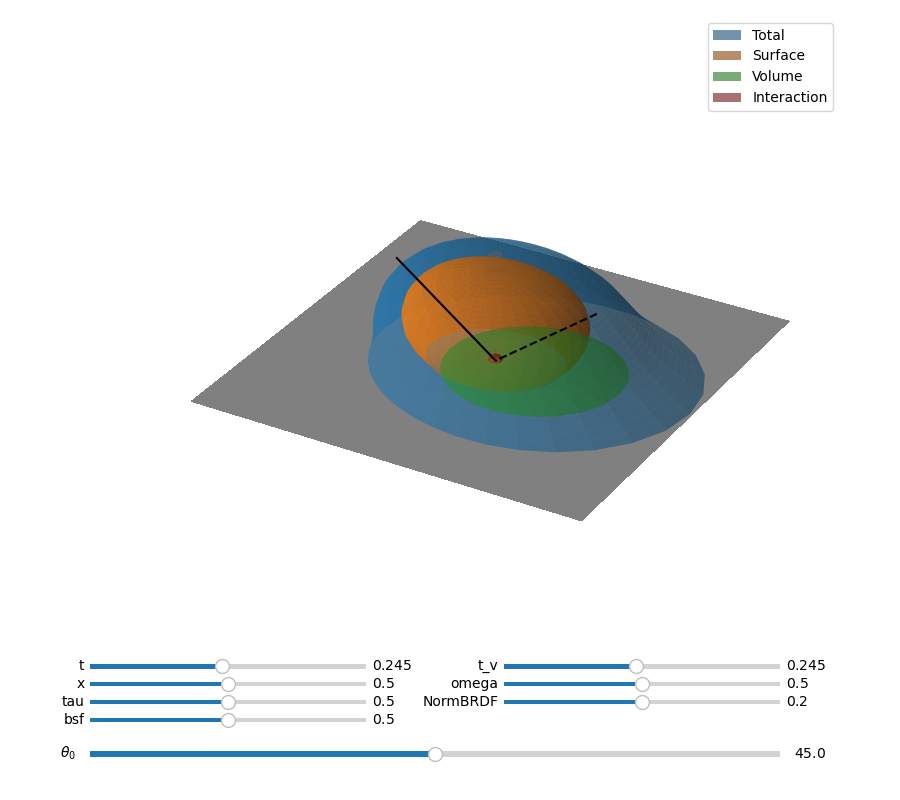

In [7]:
R.dB = False   # Create 3D plots in linear units

param_dict=dict(t=(0.01, 0.5),
                t_v=(0.01, 0.5),
                x=(0, 1),
                omega=(0, 1),
                tau=(0, 1),
                NormBRDF=(0, 0.4),
                bsf=(0, 1),
                )

a0 = R.analyze3d(param_dict=param_dict, contributions="tsvi")